In [1]:
# MNIST Dataset with perceptron(백견불여일타 책 참고)

TF는 데이터를
(Batch, Height, width , channel)

In [35]:
# MNIST 데이터를 다운로드 한다.
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
df = tf.keras.datasets.mnist.load_data()

In [36]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 10
# 0~59999이 범위에서 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

print(random_idx)

for idx in random_idx:
  img = X_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [40]:
# 검증 데이터 만들기
#sklearn : machine learning package
from sklearn.model_selection import train_test_split

#훈련/테스트 데이터를 0.7/0.3 의 비율로 분리

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state =777) # test size는 테스트셋의 비율 의미. random_state는 재산성을 위해 사용(random_seed와 동일)

print(f'훈련 데이터 {X_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {X_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [41]:
X_train.shape[0]

42000

In [42]:
num_X_train = X_train.shape[0] #42000
num_X_val = X_val.shape[0]  #18000
num_X_test = X_test.shape[0] #10000

#모델에 입력하기 전 전처리 과정.
# 255로 만들어주는 이유는 정규화!! 여러가지 이유, 모델학습, 확률로, 오버피팅을 방
X_train = (X_train.reshape((num_X_train, 28*28))) / 255 # -> Dense에 넣기 위해서 # 이미지는 0~255사이의 값을 가지고 있기 때문에, 255로 나누어준다. - > 정규화
#X_train = (X_train.reshape(X_train.shape[0],28*28)) / 255
# X_train = (X_train.reshape((60000, 28*28)))/ 255
X_val = (X_val.reshape((num_X_val, 28*28))) / 255
X_test = (X_test.reshape((num_X_test, 28*28)))/ 255

print(X_train.shape)  # 모델 입력을 위해 데이터를 784차원으로 변경 / np.Flatten()와 비슷한 np.ravel()

(42000, 784)


In [43]:
y_train # y_train은 28*28의 이미지가 2,7,6,이런식으로

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

(28,28) 형태의 데이터를 784차원의 1차원 배열로 변환 한것을 볼 수 있다. 신경망은 입력 데이터의 스케일에 매우 민감하므로 적절한 전처리 과정이 필수.

이에 대한 큰 이유로는 그래디언트 손실과 그래디언트 폭발로 인해 학습이 진행되지 않기 때문. 우리가 숫자 이미지 데이터는 각 픽셀 값이 0~255의 범위에 있기 때문에 255로 나누어 줌.

**여러 가지의 전처리 방법- 스케일링 방법**

Normalization(Min Max) :  $X$ = ${\dfrac {x-x_{min}}{x_{max}-x_{min}}}$

Robust Normalization :  $X$ = ${\dfrac {x-x_{2/4}}{x_{3/4}-x_{1/4}}}$

Standardization : $X$ = ${\dfrac {x-x_{mean}}{x_{std}}}$

In [44]:
from tensorflow.keras.utils import to_categorical

# #각 데이터의 레이블을 범주형 형태로 변경.
num_classes=10

y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)
# print(y_train)

In [45]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
y_train.shape

(42000, 10)

## Softmax 함수

- 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.

<img src='https://mblogthumb-phinf.pstatic.net/MjAxNzA2MDVfNDMg/MDAxNDk2NTkwNTY2Njcx.-soSHRQ2urRoHGkkQk-OmHJ1HJIvpS3YuO1SXeecBAQg.LVPXD-PxQ5o8mK9uPMkqvp18vwjyKUypfRfYlqTv_B8g.JPEG.wideeyed/softmax_f.jpg?type=w2'>

# 모델 구성 1

In [47]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#입력 데이터의 형태를 명시해야됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (X_val,y_val),
                    # validation_split=0.3,
                    verbose=1)


In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

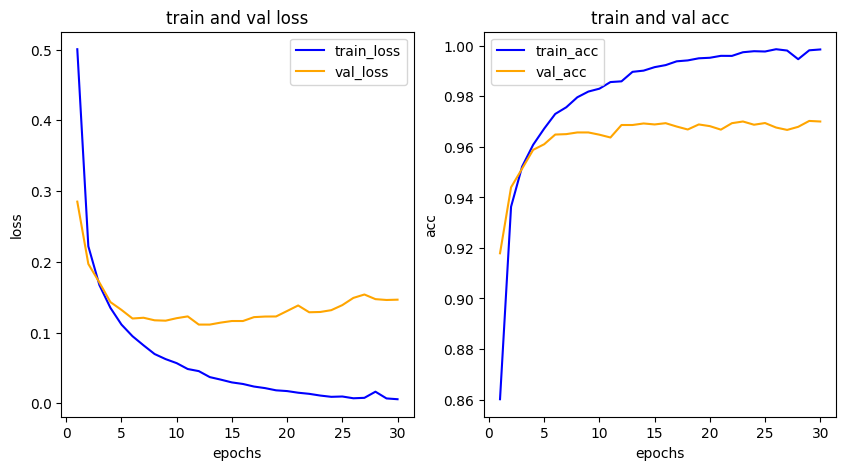

In [52]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

In [53]:
# 모델 평가하기

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1528 - acc: 0.9687


[0.15277795493602753, 0.9686999917030334]

In [ ]:
import numpy as np

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 :  {results[0]}')

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
plt.imshow(X_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()

In [ ]:
#모델 평가 방법 1 -> 혼동행렬

#sklearn.metrics 모듈을 여러 가지 평가지표에 관한 기능을 제공함.

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#혼동행렬을 만듬.->one-hot encoding
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

# 모델 구성 다른 방법!

In [1]:
# MNIST 데이터를 다운로드 한다.
import tensorflow as tf
from  tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 이미지를 1D 배열로 변환하고 정규화
num_X_train = x_train.shape[0]
num_X_test = x_test.shape[0]
x_train = (x_train.reshape((num_X_train, 28*28))) / 255
x_test = (x_test.reshape((num_X_test, 28*28))) / 255

# 레이블을 범주형 형태로 변환
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 구성하기
from  tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#입력 데이터의 형태를 명시해야됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망 # MNIST데이터는 숫자 1~10 여서
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc') # adam은 학습률을 직접 자동으로 조절해준다!! # metrics = 'mae' 절대 오차를 보여준다.
es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True) # patience=5 : 컴퓨터가 참는 횟수(과대적합이 이어지는 수 현재는 5번연속 과대적합일때, 5번연속 모델이 좋아지지 않았을때, 주기!),

hist = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), batch_size = 50) # callbacks=[es], 빼고
model.summary()

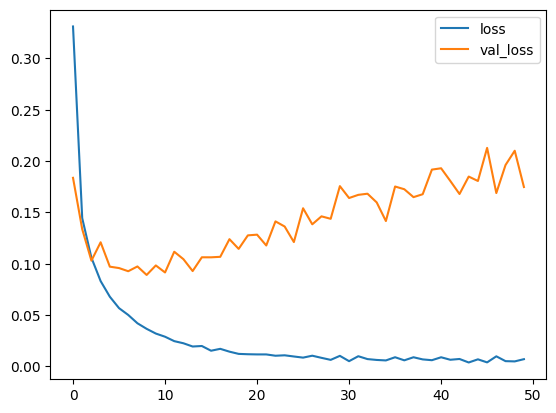

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [11]:
# 모델 평가하기

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1747 - acc: 0.9766


[0.17472663521766663, 0.9765999913215637]

In [14]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 :  {results[0]}')

313/313 [==============================] - 1s 2ms/step
(10000, 10)
각 클래스에 속할 확률 :  [6.8339962e-22 2.3339317e-28 1.1653491e-19 1.5659684e-17 3.6079979e-31
 6.0737717e-19 0.0000000e+00 1.0000000e+00 9.0551445e-26 6.3192173e-19]


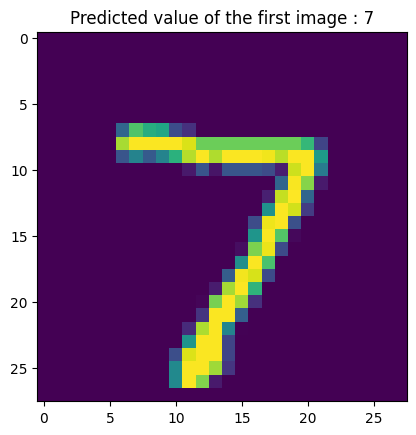

In [15]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()

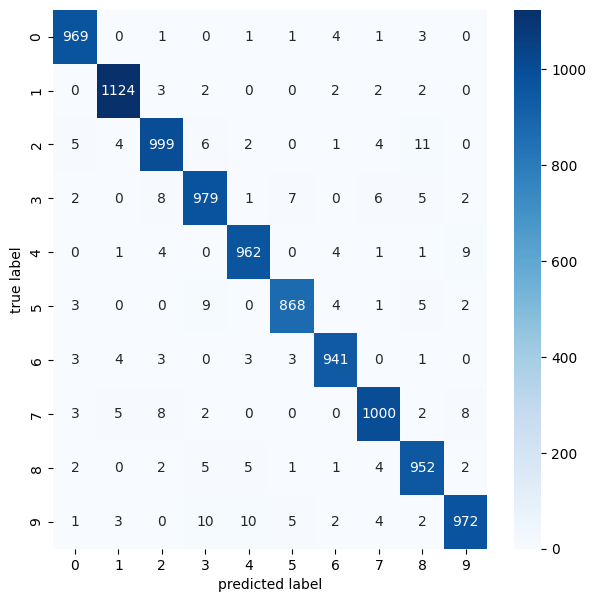

In [16]:
#모델 평가 방법 1 -> 혼동행렬

#sklearn.metrics 모듈을 여러 가지 평가지표에 관한 기능을 제공함.

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#혼동행렬을 만듬.-> one-hot encoding
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [17]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 머신러닝으로 분석

In [45]:
# 공통
import os
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set()

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [46]:
# warning 문구 무시하기 위함
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [48]:
X = np.vstack((train_x, test_x))
X = X.reshape([-1, 28*28])
#X = X.reshape([X.shape[0],28*28])

y = np.append(train_y, test_y)

print('X.shape :', X.shape)
print('y.shape :', y.shape)

X.shape : (70000, 784)
y.shape : (70000,)


In [49]:
#Tensorflow의 Momentum ,
# momentum은 확률적 경사 하강법(Stochastic Gradient Descent, SGD)의 최적화 알고리즘 중 하나입니다. 이 알고리즘은 기본적인 SGD에 비해 빠르게 수렴하도록 설계되었습니다.
#SGD()의 파라미터로 모멘텀을 지정
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(lr=0.01, momentum=0.9),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

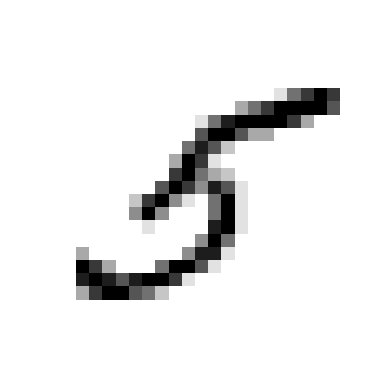

In [50]:
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")  # 비어있는 값을 주변 값으로 채워줘 . interpolation="nearest"
plt.axis("off")
plt.show()

In [51]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (60000, 784)
X_test.shape : (10000, 784)
y_train.shape : (60000,)
y_test.shape : (10000,)


# 이진 분류기 훈련
 **문제를 단순화하기 위해 하나의 숫자 5만 식별하는 분류기를 구현해보자. 숫자가 5인지 아닌지를 분류하는 이진 분류기(binary classifier)를 분류 해본다.**

In [52]:
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [53]:
np.where(y_train == 5)

(array([    8,    11,    25, ..., 59928, 59942, 59965]),)

In [54]:
a = np.arange(10)
print(np.where(a%2==0, '짝수','홀수'))

['짝수' '홀수' '짝수' '홀수' '짝수' '홀수' '짝수' '홀수' '짝수' '홀수']


이제 Scikit-Learn의 `SGDClassifier`를 이용해 분류기를 구현해보도록 하자. `SGDClassifier`는 **확률적 경사 하강법**(Stochastic Gradient Descent)을 이용한 Linear classifiers (SVM, logistic regression, a.o.)이다. 디폴트 값으로는 `loss='hinge'`이며, linear SVM을 이용해 분류기를 학습한다.

`SGDClassifier`는 매우 큰 데이터셋을 효율적으로 처리하는 장점이 있다.

In [55]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [56]:
# some_digit = X[35]
sgd_clf.predict([some_digit])

array([False])

# 성능 측정

In [57]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.964 , 0.9579, 0.9571])

위의 `cross_val_score`과 같은 기능을 하는 교차 검증 기능을 `StratifiedKFold`를 이용해 직접 구현한 코드이다. `StratifiedKFold`는 클래스별 비율이 유지되도록 폴드(Fold)를 만들기 위해 계층적 샘플링을 수행한다.

출력 결과는 위의 결과와 동일한 결과가 출력된다.

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)
skfolds = StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)  # sgd_clf 복제
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.964
0.9579
0.9571


모든 이미지를 `5가 아님`으로 분류하는 더미 분류기를 만들어 보자.

In [59]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [60]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

위의 결과에서 알 수 있듯이, 모든 숫자를 5가 아님으로 분류해도 정확도가 90% 이상이다. 그 이유는 전체 데이터셋 중 10% 정도만이 숫자 5이기 때문이다.

따라서, 정확도(accuracy)를 성능 측정 지표로 사용하는 것은 불균형한 데이터셋을 다룰 때 유용하지 않다.

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

#오차 행렬 (Confusion Matrix)

분류기(classifier)의 성능을 평가하는 더 좋은 방법은 오차행렬(confusion matrix)를 살펴보는 것이 좋다.

TP : True-Positive, 1이라고 예측했는데, 실제로도 1인 경우 → 정답

TN : True-Negative, 0이라고 예측했는데, 실제로도 0일 경우 → 정답

FP : False-Positive, 1이라고 예측했는데, 실제로는 0인 경우

FN : False-Negative, 0이라고 예측했는데, 실제로는 1인 경우

In [63]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [64]:
y_train_pred.shape

(60000,)

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred )

array([[54058,   521],
       [ 1899,  3522]])

In [66]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

# 정밀도와 재현율

In [70]:
# 정밀도
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

# 재현율
print(recall_score(y_train_5, y_train_pred))

0.8711352955725946
0.6496956281128943


In [71]:
# F1

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7442941673710904

# CNN 캐글에서 제일 투표를 많이 받은 사람의 코드

출처 : https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook


In [32]:
# pip install --upgrade tensorflow

In [164]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [165]:
# pip install tensorflow

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [167]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [168]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# free some space
del train


Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [169]:
X_train.shape, Y_train.shape

((42000, 784), (42000,))

In [170]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


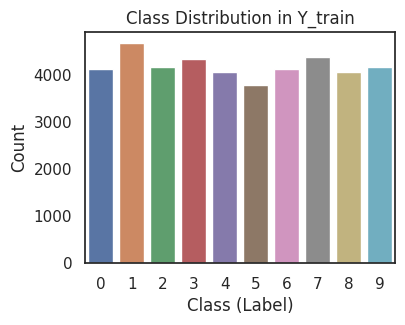

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Y_train에 있는 클래스(Label)의 분포를 시각화
plt.figure(figsize=(4, 3))
sns.countplot(x=Y_train)
plt.xlabel("Class (Label)")
plt.ylabel("Count")
plt.title("Class Distribution in Y_train")
plt.show()

In [172]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [173]:
X_train.isnull().any().describe()

# 이 코드는 DataFrame에서 누락된 데이터 (NaN 또는 None)가 있는지 확인하고 그 결과를 요약하는 코드입니다.
# 주로 데이터의 품질을 검사하고 데이터 전처리에 필요한 정보를 얻는 데 사용됩니다.

count       784
unique        1
top       False
freq        784
dtype: object

In [174]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [175]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [176]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [177]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [178]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)


# 이 코드는 클래스 레이블을 원-핫 인코딩(one-hot encoding)으로 변환하는 작업을 수행합니다.
# 원-핫 인코딩은 범주형 데이터의 클래스 레이블을 컴퓨터가 이해하기 쉬운 형태로 바꾸는 방법 중 하나입니다. 이 코드를 세부적으로 설명하겠습니다:

# Y_train: 이 코드에서는 Y_train 변수에 저장된 클래스 레이블을 기준으로 작업합니다. Y_train은 학습 데이터의 클래스 레이블을 포함하고 있는 변수입니다.

# to_categorical(Y_train, num_classes=10): to_categorical 함수는 TensorFlow 또는 Keras에서 제공하는 함수로, 클래스 레이블을 원-핫 인코딩으로 변환합니다.
# 이 함수는 두 개의 인수를 받습니다.

# Y_train: 원-핫 인코딩을 적용할 클래스 레이블이 들어 있는 변수입니다.
# num_classes: 클래스의 총 개수를 지정하는 인수입니다. 이 경우, 클래스의 개수가 10개이므로 num_classes는 10으로 지정됩니다.
# 결과: to_categorical 함수를 사용하면 각 클래스 레이블이 해당 클래스에 대한 인덱스를 나타내는 원-핫 인코딩 형태로 변환됩니다. 예를 들어, 클래스 레이블이 2인 경우 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]와 같이 변환됩니다. 이것은 컴퓨터가 클래스를 이해하고 처리하기 쉬운 형태입니다. 따라서 분류 모델을 훈련하기 위해 클래스 레이블을 이러한 형태로 변환합니다.

In [179]:
# Set the random seed
random_seed = 2

In [180]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

CNN 모델

In [181]:
# Set the CNN model
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

from tensorflow.keras.optimizers import legacy


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#  이 레이어는 단순히 다운샘플링 필터 역할을 합니다.
# 이웃한 2개의 픽셀을 보고 최대값을 선택합니다. 이는 계산 비용을 줄이고 과적합을 어느 정도 줄이는 데 사용됩니다.
# 풀링 크기(즉, 매번 풀링하는 영역 크기)를 선택해야 하며, 풀링 차원이 높을수록 다운샘플링이 중요합니다.

# 컨볼루션 레이어와 풀링 레이어를 결합하여 CNN은 로컬 기능을 결합하고 이미지의 더 많은 글로벌 기능을 학습할 수 있습니다.


model.add(Flatten()) # Flatten: Flatten 레이어는 다차원 배열을 1D 배열로 평탄화합니다. CNN의 출력을 완전 연결 레이어에 연결하기 위해 사용됩니다.
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/rmsprop.py:144: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [182]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [183]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [184]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [185]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_val,Y_val),
                              verbose = 2,
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

<ipython-input-185-26a34c78c849>:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



439/439 - 17s - loss: 0.4004 - accuracy: 0.8706 - val_loss: 0.0647 - val_accuracy: 0.9786 - lr: 0.0010 - 17s/epoch - 38ms/step


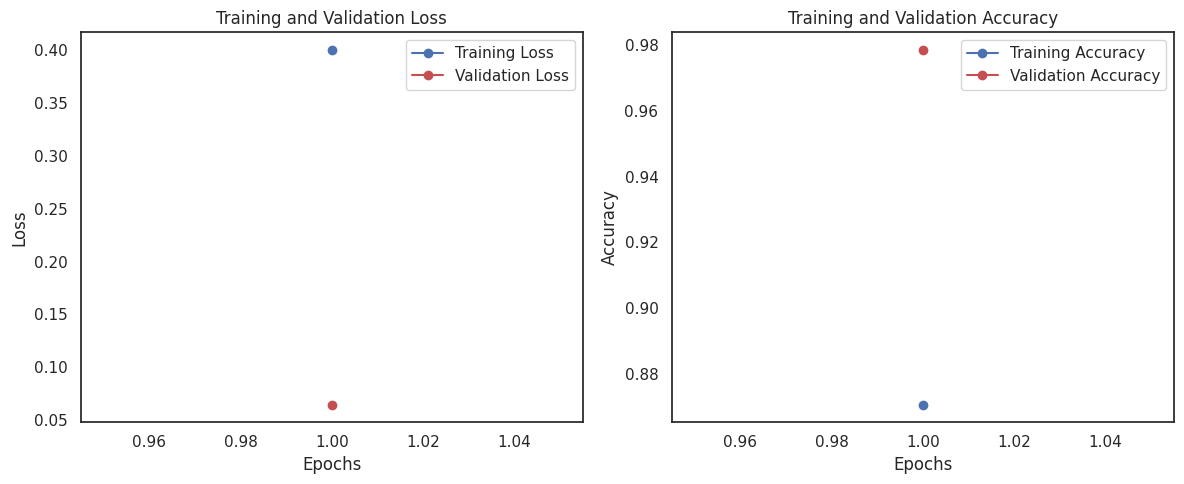

In [186]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실과 정확도 추적
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 그래프 그리기
epochs = range(1, len(train_loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


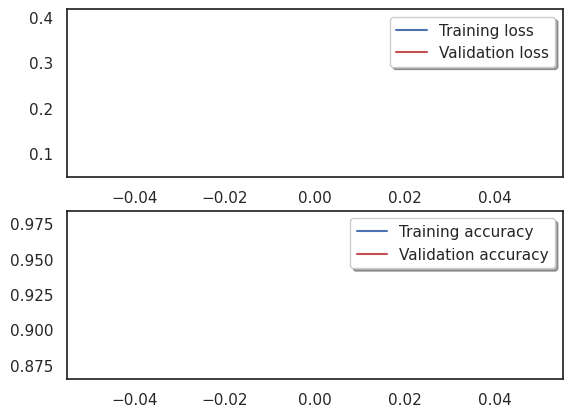

In [187]:
# 모델 평가
# Plot the loss and accuracy curves for training and validation

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()


132/132 [==============================] - 0s 2ms/step


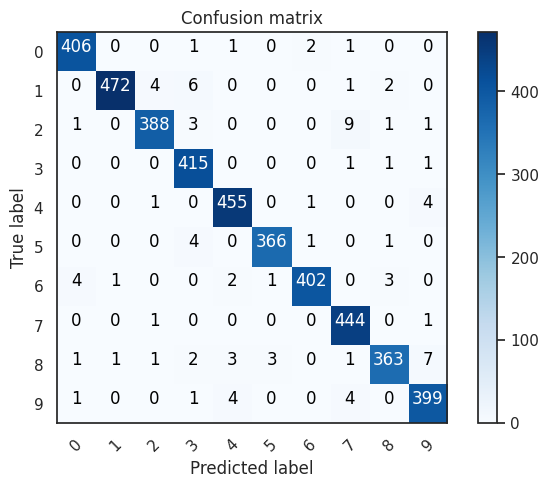

In [188]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

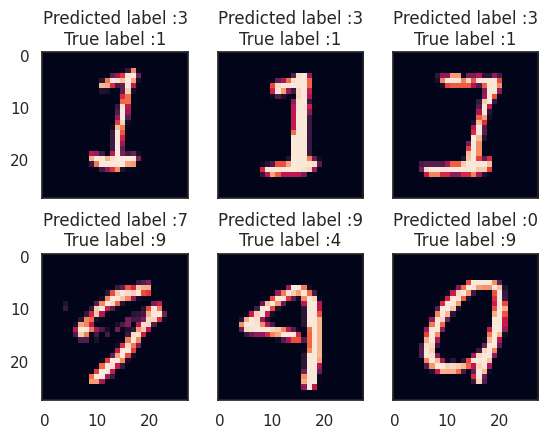

In [189]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [190]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
# np.argmax(results, axis=1): 각 이미지에 대한 클래스 예측 확률 중 가장 높은 확률을 갖는 클래스의 인덱스를 선택합니다.
# 이렇게 하면 각 이미지에 대한 예측된 클래스가 얻어집니다.

results = pd.Series(results,name="Label")

875/875 [==============================] - 2s 2ms/step


In [191]:
# 파일 저장
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

# HW) Fashion MNIST에서도 동일하게 해보자.
10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# 데이터 탐색

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
train_labels.shape, train_labels.shape

((60000,), (60000,))

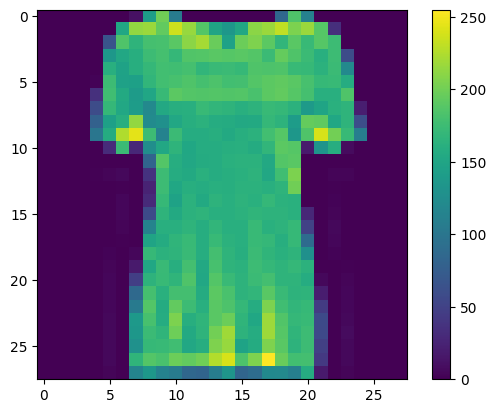

In [10]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# 데이터 전처리

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

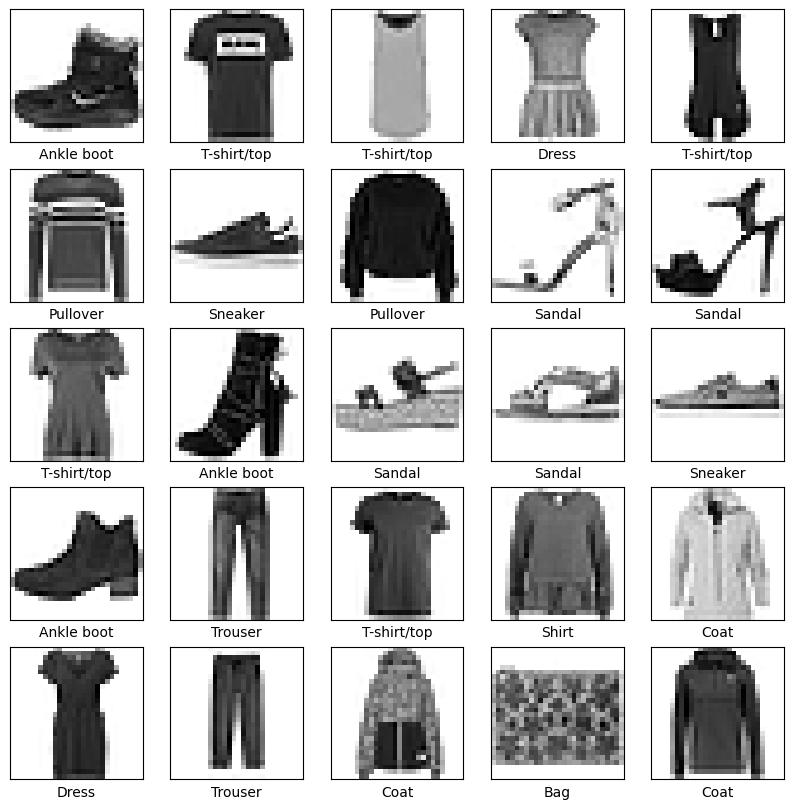

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4943 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3720 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3343 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3111 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2931 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2573 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2449 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

In [18]:
# 모델 정확도 확인
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


print('\nTest accuracy:', test_acc)


# verbose 매개변수는 Keras evaluate 메서드의 출력을 제어하는 데 사용됩니다. verbose의 값에 따라 다음과 같은 출력 형식이 결정됩니다:

# verbose=0: 출력 없음. 평가 과정에서 어떤 출력도 표시되지 않습니다.
# verbose=1: 기본값. 평가 과정에서 진행 표시줄(progress bar)이 표시됩니다. 진행률과 예상 시간이 표시되며, 각 배치마다 평가 결과가 표시됩니다.
# verbose=2: 평가 결과만 표시됩니다. 진행 표시줄이 없으며, 평가가 완료된 후에 최종 결과만 표시됩니다.
# verbose 값을 선택할 때는 평가 결과를 얼마나 자세하게 확인하고 싶은지에 따라 선택하면 됩니다. 종종 큰 데이터셋에서는 진행 표시줄을 표시하지 않는 것이 시간을 절약할 수 있습니다.

313/313 - 1s - loss: 0.3510 - accuracy: 0.8801 - 695ms/epoch - 2ms/step

Test accuracy: 0.8801000118255615


In [19]:
#예측하기

In [20]:
# 예측모델 생성 -> 학습된 모델에 softmax로 다시
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

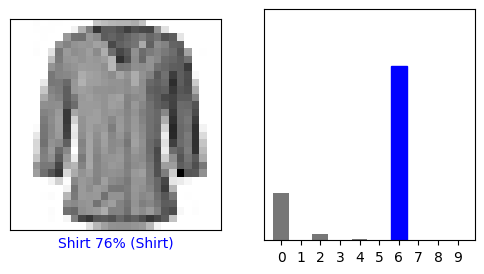

In [24]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

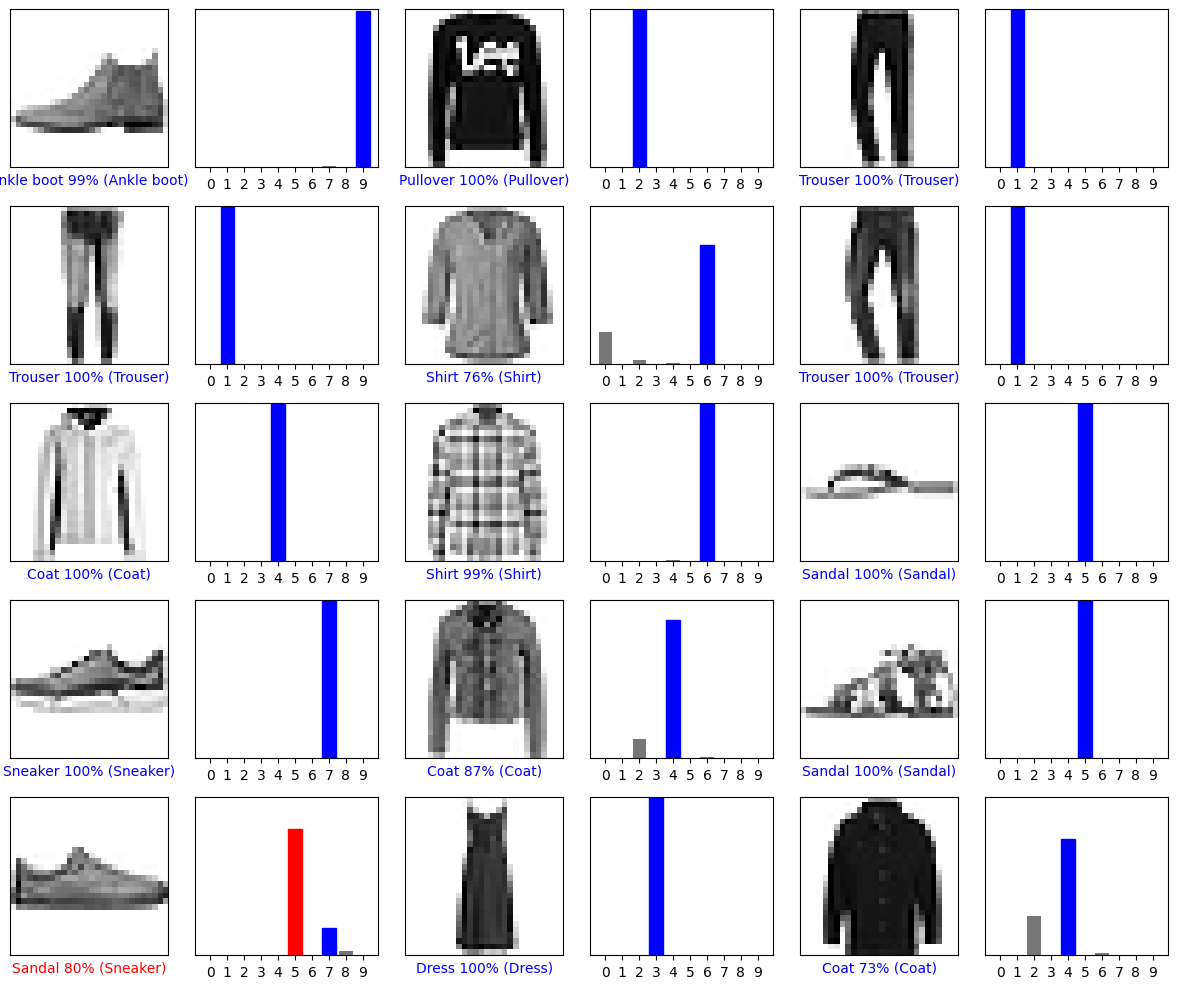

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# 훈련된 모델 생성하기

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# img = (np.expand_dims(img, 0)): 이 코드는 이미지 데이터 img를 4D 배열로 확장합니다.
# 일반적으로 이미지 데이터를 모델에 입력하려면 배치 차원이 있어야 합니다. 즉, 이미지 하나를 처리하는 것이 아니라 이미지 배치를 처리하는 것이 일반적입니다. 따라서 np.expand_dims 함수를 사용하여 이미지를 하나의 배치로 확장합니다.

# np.expand_dims: 배열의 차원을 확장하는 NumPy 함수입니다.
# img: 이미지 데이터 배열.
# 0: 차원을 확장할 위치를 지정하는 매개변수로, 여기서는 이미지 데이터를 가장 앞에 추가하여 배치 차원을 생성합니다.
# img는 이제 (1, height, width) 형태의 3D 배열이 되며, 이는 모델에 입력하기 위한 형태입니다.
# 4D 배열에서 첫 번째 차원은 배치 크기를 나타내며, 여기서는 1개의 이미지를 처리하므로 1이 됩니다.

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 101ms/step
[[1.3261944e-05 3.2964348e-13 9.9957842e-01 6.5097587e-11 3.4897131e-04
  3.5596881e-10 5.9336970e-05 3.5918942e-17 2.1432809e-09 1.2039511e-13]]


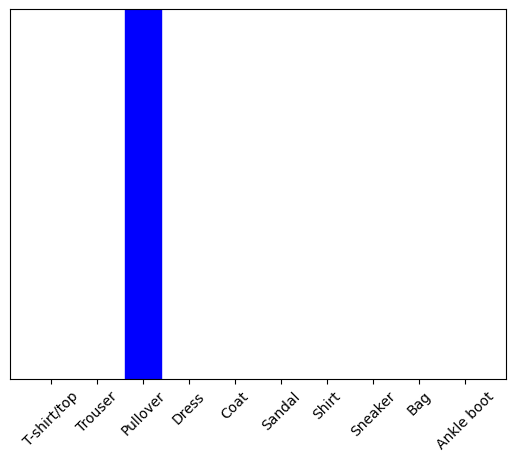

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2